In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [93]:
df=pd.read_csv('../output/no_outliers.csv',index_col=False)
df.FamilyIncome=(df.FamilyIncome-df.FamilyIncome.mean())/df.FamilyIncome.std()
X=df[['ASVAB','HighSchoolGrade']]
y=df.FamilyIncome

In [94]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,-0.182664,7.0
1,58.483,0.574338,5.0
2,27.978,2.265382,6.0
3,22.001,-0.060567,3.0
4,3.585,-1.043057,5.0
...,...,...,...
5015,18.599,-0.475697,5.0
5016,12.716,-0.660283,3.0
5017,27.785,-0.585584,5.0
5018,96.478,-0.417090,7.0


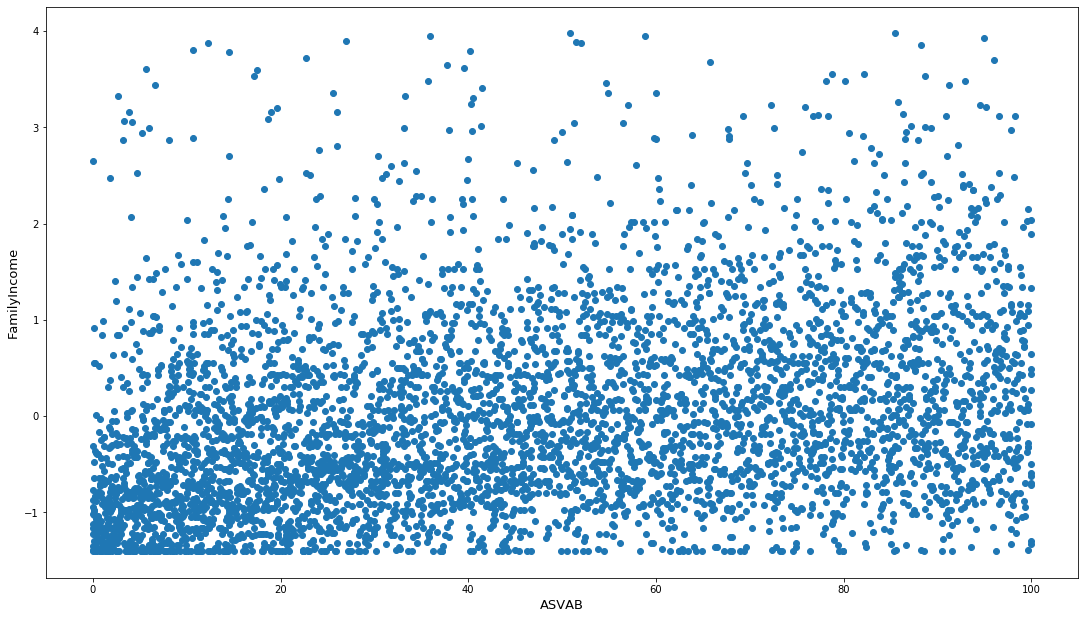

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

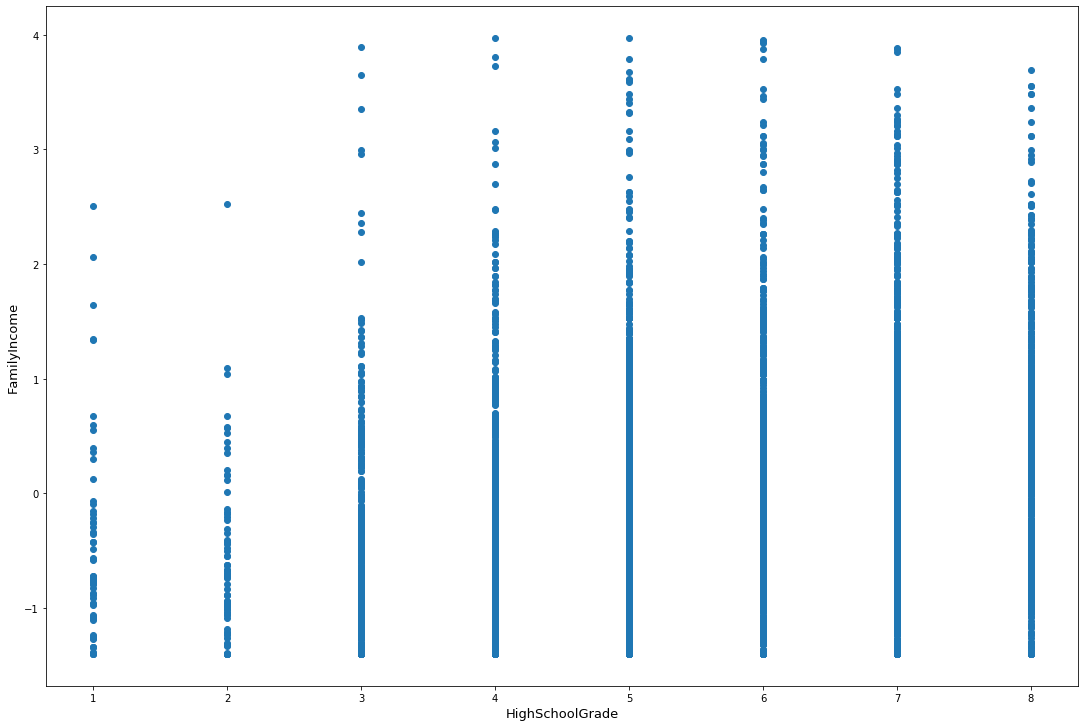

In [96]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('HighSchoolGrade', fontsize=13)
plt.show()
plt.close()

In [97]:
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [98]:
print(X.shape)
print(y.shape)


(5020, 2)
(5020,)


In [101]:
regressor = LinearRegression()  
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
#To retrieve the intercept:
print(regressor.intercept_)
print(regressor.score(X, y))

                 Coefficient
ASVAB               0.008612
HighSchoolGrade     0.067382
-0.7729334108390695
0.100761010727623


**Let's try splitting the data**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:

print(X_train.shape)
print(y_train.shape)

regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train) #training the algorithm

(4016, 2)
(4016,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
coeff_df_2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  

print(coeff_df_2)
print(regressor2.intercept_)
print(regressor2.score(X_train, y_train))
print(regressor2.score(X_test, y_test))

                 Coefficient
ASVAB               0.009116
HighSchoolGrade     0.068942
-0.8098562254515441
0.1108636356322874
0.056599600663490346


In [105]:
y_pred = regressor2.predict(X_test)
y_pred_2 = regressor2.predict(X_train)

print(1-(((y_pred-y_test)**2).sum()/((y_test - y_test.mean()) ** 2).sum()))
print(1-(((y_pred_2-y_train)**2).sum()/((y_train - y_train.mean()) ** 2).sum()))

0.056599600663490346
0.1108636356322874


In [78]:
print(metrics.r2_score(y_test,y_pred))

0.056599600663490235


In [79]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.92879010575464
Mean Squared Error: 1538.0718148352082
Root Mean Squared Error: 39.218258692032826


**Visualizing models**

In [57]:
from mpl_toolkits.mplot3d import Axes3D


In [58]:
x_pred1 = np.linspace(1, 8, 8)   # range of grades values
y_pred1 = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred1, y_pred1)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [62]:
model_viz

array([[  6.        ,   0.        ],
       [  6.62068966,   0.        ],
       [  7.24137931,   0.        ],
       ...,
       [ 22.75862069, 100.        ],
       [ 23.37931034, 100.        ],
       [ 24.        , 100.        ]])

In [59]:
x_pred1

array([ 6.        ,  6.62068966,  7.24137931,  7.86206897,  8.48275862,
        9.10344828,  9.72413793, 10.34482759, 10.96551724, 11.5862069 ,
       12.20689655, 12.82758621, 13.44827586, 14.06896552, 14.68965517,
       15.31034483, 15.93103448, 16.55172414, 17.17241379, 17.79310345,
       18.4137931 , 19.03448276, 19.65517241, 20.27586207, 20.89655172,
       21.51724138, 22.13793103, 22.75862069, 23.37931034, 24.        ])

In [60]:
y_pred1

array([  0.        ,   3.44827586,   6.89655172,  10.34482759,
        13.79310345,  17.24137931,  20.68965517,  24.13793103,
        27.5862069 ,  31.03448276,  34.48275862,  37.93103448,
        41.37931034,  44.82758621,  48.27586207,  51.72413793,
        55.17241379,  58.62068966,  62.06896552,  65.51724138,
        68.96551724,  72.4137931 ,  75.86206897,  79.31034483,
        82.75862069,  86.20689655,  89.65517241,  93.10344828,
        96.55172414, 100.        ])

In [61]:
xx_pred

array([[ 6.        ,  6.62068966,  7.24137931,  7.86206897,  8.48275862,
         9.10344828,  9.72413793, 10.34482759, 10.96551724, 11.5862069 ,
        12.20689655, 12.82758621, 13.44827586, 14.06896552, 14.68965517,
        15.31034483, 15.93103448, 16.55172414, 17.17241379, 17.79310345,
        18.4137931 , 19.03448276, 19.65517241, 20.27586207, 20.89655172,
        21.51724138, 22.13793103, 22.75862069, 23.37931034, 24.        ],
       [ 6.        ,  6.62068966,  7.24137931,  7.86206897,  8.48275862,
         9.10344828,  9.72413793, 10.34482759, 10.96551724, 11.5862069 ,
        12.20689655, 12.82758621, 13.44827586, 14.06896552, 14.68965517,
        15.31034483, 15.93103448, 16.55172414, 17.17241379, 17.79310345,
        18.4137931 , 19.03448276, 19.65517241, 20.27586207, 20.89655172,
        21.51724138, 22.13793103, 22.75862069, 23.37931034, 24.        ],
       [ 6.        ,  6.62068966,  7.24137931,  7.86206897,  8.48275862,
         9.10344828,  9.72413793, 10.34482759, 10